In [51]:
import os
import sys 
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import plotly
import plotly.graph_objects as go
import plotly.express as px
import kaleido ##pip install -U kaleido ##to save a plotly fig
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict

In [52]:
df1 = pd.read_csv('Stable_Data_CSV.csv')
df2 = pd.read_csv('6w_all_features.csv')
df_stable = df2[df2.set_index(['participant_id']).index.isin(df1.set_index(['participant_id']).index)]

In [53]:
df_stable_US = df_stable.loc[(df_stable['arm'] == 1)]
df_stable_WN = df_stable.loc[(df_stable['arm'] == 2)]
df_stable_US=df_stable_US.drop(['participant_id','arm'],axis=1)
df_stable_WN=df_stable_WN.drop(['participant_id','arm'],axis=1)
print(len(df_stable_US))
print(len(df_stable_WN))
#df_stable_US=(df_stable_US[['c_3','sl_1','a_2','q_1','tfi_total.1','tfi_total.2','tfi_total.3']])
#df_stable_WN=(df_stable_WN[['sl_2','r_1','e_1','tfi_total.1','tfi_total.2','tfi_total.3']])

df_stable_WN

31
30


,i_1,i_2,i_3,sc_1,sc_2,sc_3,c_1,c_2,c_3,sl_1,...,sc_sub.1,c_sub.1,sl_sub.1,a_sub.1,r_sub.1,q_sub.1,e_sub.1,tfi_total.1,tfi_total.2,tfi_total.3
51,8.0,8.0,7.0,8.0,7.0,6.0,6.0,6.0,5.0,8.0,...,63.3,46.7,53.3,76.7,80.0,62.5,60.0,64.0,72.4,80.4
52,8.0,7.0,7.0,9.0,6.0,8.0,6.0,6.0,5.0,6.0,...,46.7,53.3,26.7,33.3,53.3,52.5,40.0,47.6,64.0,71.2
53,7.0,8.0,5.0,8.0,8.0,8.0,6.0,6.0,6.0,8.0,...,73.3,43.3,63.3,73.3,60.0,42.5,40.0,57.2,60.4,64.8
55,4.0,6.0,3.0,6.0,5.0,5.0,1.0,1.0,1.0,7.0,...,33.3,16.7,53.3,63.3,60.0,17.5,13.3,37.2,27.6,44.8
56,7.0,7.0,5.0,10.0,6.0,5.0,2.0,3.0,3.0,3.0,...,66.7,33.3,40.0,86.7,33.3,45.0,40.0,51.2,55.2,70.0
57,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,...,63.3,60.0,10.0,70.0,50.0,65.0,60.0,55.2,14.0,14.0
59,6.0,6.0,6.0,8.0,6.0,7.0,5.0,4.0,4.0,8.0,...,70.0,60.0,63.3,43.3,80.0,30.0,40.0,55.2,26.0,37.6
60,9.0,8.0,7.0,10.0,7.0,10.0,8.0,7.0,6.0,10.0,...,80.0,46.7,73.3,60.0,80.0,62.5,40.0,63.2,73.6,83.2
61,6.0,6.0,3.0,10.0,7.0,6.0,5.0,5.0,5.0,6.0,...,63.3,40.0,36.7,43.3,53.3,32.5,50.0,47.2,35.2,42.8
63,8.0,8.0,8.0,5.0,6.0,6.0,6.0,6.0,5.0,1.0,...,26.7,26.7,6.7,100.0,56.7,97.5,43.3,51.6,44.0,35.2


In [57]:
# with scaled data

n_epochs=200
n_batch_size=10
n_timesteps=2
n_features=34
lr=0.001
kfold = KFold(n_splits=5)
error_scores_US=[]
error_scores_WN=[]

def data_prep(df):
    sc_x=StandardScaler()
    sc_y=StandardScaler()
    ## Separate dependent and independent features 
    X=df.drop(['tfi_total.2','tfi_total.3'],axis=1).values
    y = df[['tfi_total.2']].values
    #scale x
    x_scaler=sc_x.fit(X)
    X=x_scaler.transform(X)
    #scale y
    y_scaler=sc_y.fit(y)
    y=y_scaler.transform(y)
    # Reshape input to be 3D for LSTM[samples, timesteps, features]
    X = X.reshape((X.shape[0],n_timesteps,n_features))
    print(X.shape,y.shape)
    input_shape=(n_timesteps,X.shape[2])
    print(input_shape)
    return X,y,input_shape,x_scaler,y_scaler

def create_lstm_model(input_shape,y_scaler):
    
    def error_in_tfi(y_true,y_pred): 
        y=y_true.numpy()
        yhat=y_pred.numpy()
        y=np.reshape(y, (1,-1))
        yhat=np.reshape(yhat, (1,-1))
        y=y_scaler.inverse_transform(y)
        yhat=y_scaler.inverse_transform(yhat)
        y=tf.convert_to_tensor(y, dtype=tf.float32)
        yhat=tf.convert_to_tensor(yhat, dtype=tf.float32)
        return K.mean(abs(y - yhat), axis=-1)  #K.mean(square(y_true - y_pred), axis=-1)
    
    K.clear_session
    input_shape=input_shape
    model = Sequential([ #kernel_regularizer=regularizers.L1(0.001)
      LSTM(50, activation='relu',kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01),input_shape=input_shape),
      Dropout(0.2), # 20% of Neuron will get deactivated during training
      Dense(1,kernel_initializer='normal',activation = 'linear')                      
    ])             

    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=lr),run_eagerly=True,metrics=[error_in_tfi])
    return model
    

def cross_val(df,error_scores):
    X,y,input_shape,x_scaler,y_scaler=data_prep(df)
    for train_index, test_index in kfold.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model=create_lstm_model(input_shape,y_scaler)
        history=model.fit(x_train, y_train, epochs=50, batch_size=10)
        val_mse,val_mae=model.evaluate(x_test,y_test)
        error_scores.append(val_mae)
    return history,x_scaler,y_scaler,error_scores

US_history,US_x_scaler,US_y_scaler,US_error_scores=cross_val(df_stable_US,error_scores_US)
WN_history,WN_x_scaler,WN_y_scaler,WN_error_scores=cross_val(df_stable_WN,error_scores_WN)
    

(31, 2, 34) (31, 1)
(2, 34)
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30] TEST: [0 1 2 3 4 5 6]
Epoch 1/50
3/3 [==============================] - 0s 32ms/step - loss: 6.9279 - error_in_tfi: 17.2078
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 6.6868 - error_in_tfi: 16.1709
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 6.4751 - error_in_tfi: 16.3825
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 6.2544 - error_in_tfi: 15.6953
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 6.0240 - error_in_tfi: 14.5197
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 5.8363 - error_in_tfi: 15.9592
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 5.6379 - error_in_tfi: 15.8373
Epoch 8/50
3/3 [==============================] - 0s 31ms/step - loss: 5.4475 - error_in_tfi: 16.7072
Epoch 9/50
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 33ms/step - loss: 2.9464 - error_in_tfi: 13.3747
Epoch 25/50
3/3 [==============================] - 0s 32ms/step - loss: 2.8118 - error_in_tfi: 13.9084
Epoch 26/50
3/3 [==============================] - 0s 33ms/step - loss: 2.6878 - error_in_tfi: 13.3099
Epoch 27/50
3/3 [==============================] - 0s 33ms/step - loss: 2.6189 - error_in_tfi: 13.8047
Epoch 28/50
3/3 [==============================] - 0s 33ms/step - loss: 2.4862 - error_in_tfi: 13.3990
Epoch 29/50
3/3 [==============================] - 0s 31ms/step - loss: 2.3566 - error_in_tfi: 13.4568
Epoch 30/50
3/3 [==============================] - 0s 30ms/step - loss: 2.2857 - error_in_tfi: 12.7916
Epoch 31/50
3/3 [==============================] - 0s 30ms/step - loss: 2.1815 - error_in_tfi: 14.8773
Epoch 32/50
3/3 [==============================] - 0s 30ms/step - loss: 2.0479 - error_in_tfi: 13.8407
Epoch 33/50
3/3 [==============================] - 0s 30ms/step - loss: 2.0198 - erro

1/1 [==============================] - 0s 30ms/step - loss: 1.8533 - error_in_tfi: 18.8644
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 25 26 27 28 29
 30] TEST: [19 20 21 22 23 24]
Epoch 1/50
3/3 [==============================] - 0s 30ms/step - loss: 7.1148 - error_in_tfi: 18.1188
Epoch 2/50
3/3 [==============================] - 0s 30ms/step - loss: 6.8769 - error_in_tfi: 16.9268
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 6.6627 - error_in_tfi: 18.5268
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 6.4362 - error_in_tfi: 17.0876
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 6.2069 - error_in_tfi: 16.9799
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 5.9919 - error_in_tfi: 16.5282
Epoch 7/50
3/3 [==============================] - 0s 30ms/step - loss: 5.8061 - error_in_tfi: 16.3178
Epoch 8/50
3/3 [==============================] - 0s 32ms/step - loss: 5.5915 - erro

3/3 [==============================] - 0s 31ms/step - loss: 3.2355 - error_in_tfi: 15.5987
Epoch 23/50
3/3 [==============================] - 0s 31ms/step - loss: 3.0919 - error_in_tfi: 13.9741
Epoch 24/50
3/3 [==============================] - 0s 31ms/step - loss: 2.9688 - error_in_tfi: 13.4531
Epoch 25/50
3/3 [==============================] - 0s 30ms/step - loss: 2.8182 - error_in_tfi: 13.1096
Epoch 26/50
3/3 [==============================] - 0s 32ms/step - loss: 2.7269 - error_in_tfi: 13.7067
Epoch 27/50
3/3 [==============================] - 0s 31ms/step - loss: 2.6203 - error_in_tfi: 13.8483
Epoch 28/50
3/3 [==============================] - 0s 31ms/step - loss: 2.4774 - error_in_tfi: 13.7191
Epoch 29/50
3/3 [==============================] - 0s 31ms/step - loss: 2.3883 - error_in_tfi: 14.2494
Epoch 30/50
3/3 [==============================] - 0s 32ms/step - loss: 2.3198 - error_in_tfi: 14.0423
Epoch 31/50
3/3 [==============================] - 0s 30ms/step - loss: 2.1870 - erro

3/3 [==============================] - 0s 31ms/step - loss: 0.9141 - error_in_tfi: 9.8791
Epoch 49/50
3/3 [==============================] - 0s 30ms/step - loss: 0.8841 - error_in_tfi: 9.2821
Epoch 50/50
1/1 [==============================] - 0s 29ms/step - loss: 1.2892 - error_in_tfi: 17.3990
TRAIN: [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] TEST: [ 6  7  8  9 10 11]
Epoch 1/50
3/3 [==============================] - 0s 30ms/step - loss: 7.0514 - error_in_tfi: 18.6602
Epoch 2/50
3/3 [==============================] - 0s 30ms/step - loss: 6.8185 - error_in_tfi: 18.0951
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 6.6031 - error_in_tfi: 17.5904
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 6.3454 - error_in_tfi: 17.5143
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 6.1462 - error_in_tfi: 17.5368
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 5.9453 - error_in

3/3 [==============================] - 0s 30ms/step - loss: 3.4764 - error_in_tfi: 16.6943
Epoch 21/50
3/3 [==============================] - 0s 30ms/step - loss: 3.3186 - error_in_tfi: 14.5933
Epoch 22/50
3/3 [==============================] - 0s 30ms/step - loss: 3.2156 - error_in_tfi: 15.8357
Epoch 23/50
3/3 [==============================] - 0s 30ms/step - loss: 3.0317 - error_in_tfi: 14.7726
Epoch 24/50
3/3 [==============================] - 0s 30ms/step - loss: 2.9597 - error_in_tfi: 14.3578
Epoch 25/50
3/3 [==============================] - 0s 30ms/step - loss: 2.7869 - error_in_tfi: 15.0495
Epoch 26/50
3/3 [==============================] - 0s 30ms/step - loss: 2.7005 - error_in_tfi: 13.9179
Epoch 27/50
3/3 [==============================] - 0s 30ms/step - loss: 2.5782 - error_in_tfi: 13.8368
Epoch 28/50
3/3 [==============================] - 0s 30ms/step - loss: 2.4175 - error_in_tfi: 13.5958
Epoch 29/50
3/3 [==============================] - 0s 30ms/step - loss: 2.3381 - erro

3/3 [==============================] - 0s 31ms/step - loss: 0.7344 - error_in_tfi: 7.1730
Epoch 47/50
3/3 [==============================] - 0s 30ms/step - loss: 0.7111 - error_in_tfi: 7.5766
Epoch 48/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6669 - error_in_tfi: 6.9747
Epoch 49/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6352 - error_in_tfi: 7.9790
Epoch 50/50
1/1 [==============================] - 0s 30ms/step - loss: 2.8193 - error_in_tfi: 28.9231
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29]
Epoch 1/50
3/3 [==============================] - 0s 31ms/step - loss: 7.0398 - error_in_tfi: 18.9643
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 6.8082 - error_in_tfi: 18.8184
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 6.5650 - error_in_tfi: 16.9709
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 6.3445 - error_in

In [64]:
print(US_error_scores)
print(WN_error_scores)

[18.186399459838867, 17.514442443847656, 18.864431381225586, 15.85552978515625, 17.055435180664062]
[17.39898681640625, 13.470962524414062, 10.605676651000977, 28.92311668395996, 10.264402389526367]


In [59]:
US_error=np.mean(US_error_scores)
print(US_error)
WN_error=np.mean(WN_error_scores)
print(WN_error)

17.495247650146485
16.132629013061525


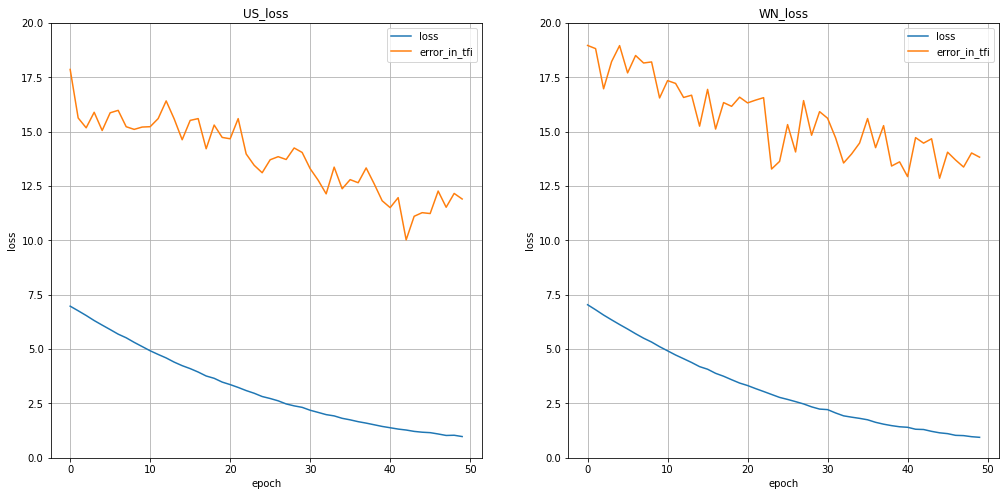

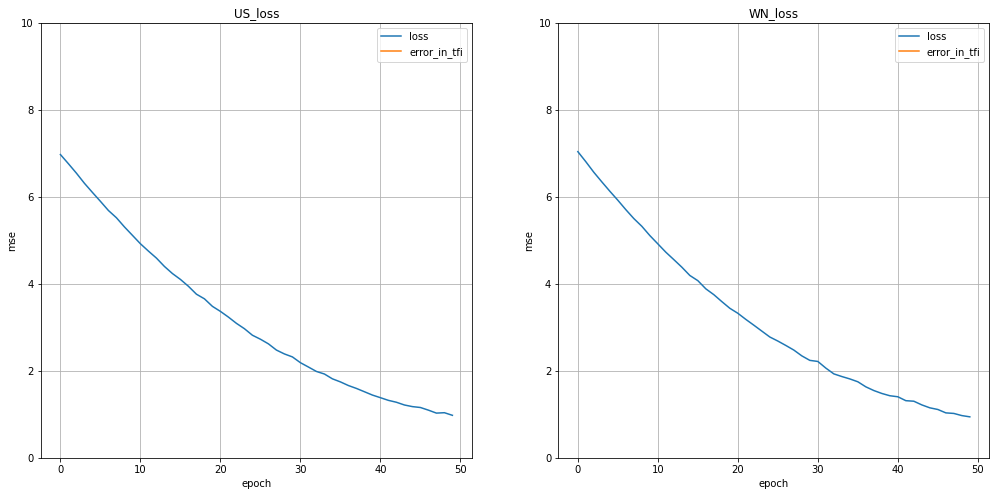

In [61]:
#show learning curves
#mean training loss measured over each epoch
#mean validation loss measured at the end of each epoch
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(US_history.history) #selecting columns
WN_plot = pd.DataFrame(WN_history.history)
US_plot.plot(ax=axes[0],ylim=(0,20),title="US_loss",xlabel='epoch',ylabel='loss').grid(True)
WN_plot.plot(ax=axes[1],ylim=(0,20),title="WN_loss",xlabel='epoch',ylabel='loss').grid(True)
plt.savefig("plots/loss_and_matrics.png")

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(US_history.history) #selecting columns
WN_plot = pd.DataFrame(WN_history.history)
US_plot.plot(ax=axes[0],ylim=(0,10),title="US_loss",xlabel='epoch',ylabel='mse').grid(True)
WN_plot.plot(ax=axes[1],ylim=(0,10),title="WN_loss",xlabel='epoch',ylabel='mse').grid(True)
plt.savefig("plots/loss.png")



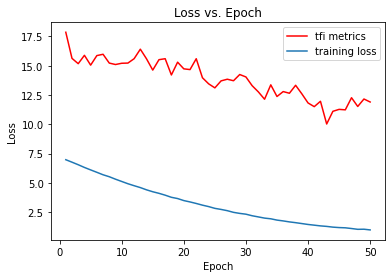

In [62]:
def plot_loss(history):
        train_loss=history.history['loss']
        train_metrics=history.history['error_in_tfi']
        x=list(range(1,len(train_metrics)+1))
        plt.plot(x,train_metrics,color='red',label='tfi metrics')
        plt.plot(x,train_loss,label='training loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epoch')
        plt.legend()

plot_loss(US_history)

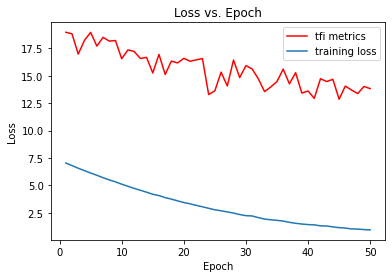

In [63]:
plot_loss(WN_history)